# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model).

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, flatten each image to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
```

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.


Loading the MNIST data set

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Plotting a single sample of each digit 

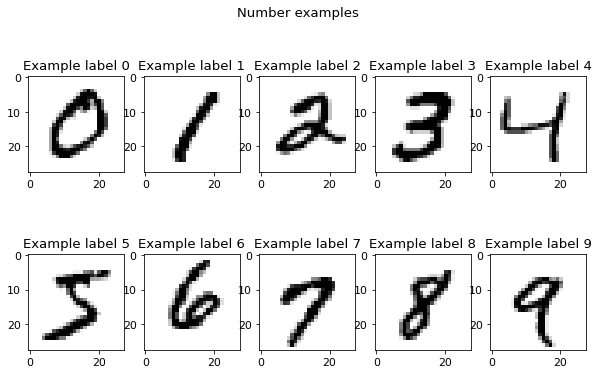

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 11})

fig, ax = plt.subplots(2,5)
ax = ax.flatten()

fig.suptitle('Number examples') 
for i in range(10):
    im_idx = y[y==str(i)].index[0]
    plottable_image = np.reshape(X.loc[im_idx].values, (28, 28))
    ax[i].imshow(plottable_image, cmap='gray_r')
    ax[i].set_title(f'Example label {i}')


Dividing our data into train and test sets, using 1/7 of the data for testing.

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1.0/7.0) 

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
**Write the classification rule based on this Naive Bayes model**    
While the genral Naive Bayes clssaification rule is given by   
$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$
    
The decision rule for Bernoulli naive Bayes defines the likelihood $P(x_i \mid y)$ like this:   
$P(x_i \mid y) = P(x_i = 1 \mid y) x_i + (1 - P(x_i = 0 \mid y)) (1 - x_i) $   
And for us:      
$P_{ji}(x_i) = Pr(x_i | y=j) = p_{ji}\cdot x_{i} + (1 - p_{ji})) (1 - x_{i})$    
and the prior is given by:   
$P(y) = Pr(y=j) = \pi_j $   


and since it is easier to calculate the log-sum instead of the product, our decision rule is:

$\hat{y} = \arg\max_y log\pi_j +  \sum_{i=1}^{n} log(p_{ji}\cdot x_{i} + (1 - p_{ji})) (1 - x_{i}))$

The training of the model is done by calculating the likelihood for each feature:    
$ P(x_i \mid y) = \prod_{i=1}^{n} (p_{ij}^{x_i} * (1 - p_{ij})^{1 - x_i}) $

To overcome the situation of missing pixles (which will nullify the result), we can add the Laplacean prior.     
$P = \frac{1 + M_{ji}}{2 + M_j}$    
Where $M_{ji}$ is the number of colored pixles from category j
and $M_{j}$ is the total number of examples of category j

   







#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2


##### Creating a model

In [ ]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(binarize=0)

clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))


0.8347


Lets have a visual impression for the algorithm success for 10 random example.

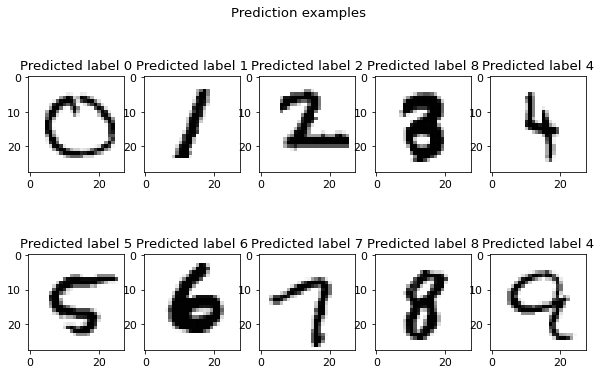

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)

fig, ax = plt.subplots(2,5)
ax = ax.flatten()

pred_y = clf.predict(X_test)

y_test_r = y_test.reset_index(drop=True)
X_test_r = X_test.reset_index(drop=True)

fig.suptitle('Prediction examples') 
for i in range(10):
    all_idx = y_test_r[y_test_r==str(i)].index  # Getting all the indeces of each digit
    img_idx = np.random.choice(all_idx)  # Choosing a random example
    plottable_image = np.reshape(X_test_r.iloc[img_idx].values, (28, 28))
    ax[i].imshow(plottable_image, cmap='gray_r')
    ax[i].set_title(f'Predicted label {pred_y[img_idx]}') # Adding label


plt.show()

##### 1. Plot the mean image of each class (estimated  p^ji ) and generate one sample of each class (remember, you can do this since this is a generative model). 

Plotting the mean images

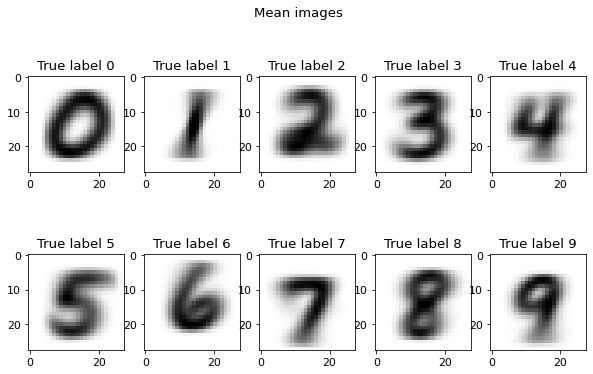

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)

fig, ax = plt.subplots(2,5)
i = 0
for ax in ax.flatten():
    # Converting from log to number
    vec_mean = np.exp(clf.feature_log_prob_[i]) 
    img = vec_mean.reshape((28, 28)) 
    ax.imshow(img, cmap="gray_r")
    ax.set_title(f'True label {i}')
    i += 1

fig.suptitle("Mean images")

# show plot
plt.show()

Genrating new images

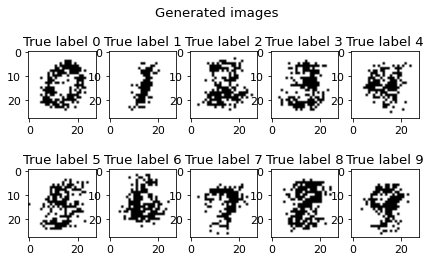

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots(2,5, figsize=(7,4))

# For each class
i = 0
for ax in ax.flatten():
    # Generating the image based on the probability
    vec_generated = np.random.binomial(1, np.exp(clf.feature_log_prob_[i]), 784)
    img = vec_generated.reshape((28, 28)) # Reshaping
    ax.imshow(img, cmap="gray_r") # Plotting
    ax.set_title(f'True label {i}') # Adding title
    i += 1

fig.suptitle("Generated images")

plt.show()

##### 2.Plotting the confusion matrix of your classifier, as claculated on the test data 

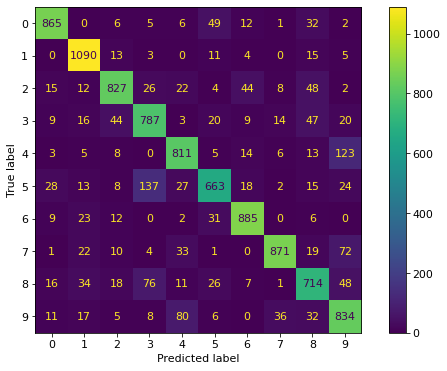

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred_y = clf.predict(X_test)

cm = confusion_matrix(y_test, pred_y, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();


Calculating the total accuracy (fraction of correctly classified images), and summarize the results in your own words


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_y)

0.8347

We can see that our model predicted the figure correctly in 83% of the images. Using the confusion matrix, we can see that some digits, like 1 and 0, are easier to classify, while other digits like 5, are not classified well. We  can also see that the model confuses between the digits 5 and 3 and between 4 and 9.

##### 3.Think of a way you can find the optimal threshold of the binarization part. There is no need to actually perform this task --- just describe what you would have done. 

We can tune the binarize parameter by plotting a validation curve and looking for the optimal score, or using GridCV.

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.


* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* Write a class `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`. If there are differences try to think why
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).

### Optional: Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words. 

Bonus: How can you correct the analyzed error? 

To read more about model interpretation, see the blogpost below and my tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

In [ ]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word', 'support'],['other'])

This word support the first class but this the other


#### Loading the train data using from sklearn.datasets import fetch_20newsgroups. remove headers, footers and quotes

In [1]:
from sklearn.datasets import fetch_20newsgroups

X, y = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), return_X_y=True)

Using `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
print('example test:\n', X[0])
example_text = X[:1] # The first text
coun_vect = CountVectorizer(stop_words='english')
count_matrix = coun_vect.fit_transform(example_text)
print(count_matrix)



example test:
 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
  (0, 32)	1
  (0, 13)	1
  (0, 7)	4
  (0, 26)	1
  (0, 8)	1
  (0, 9)	1
  (0, 30)	1
  (0, 19)	1
  (0, 18)	1
  (0, 0)	1
  (0, 11)	1
  (0, 1)	1
  (0, 6)	1
  (0, 4)	1
  (0, 10)	1
  (0, 24)	1
  (0, 28)	1
  (0, 2)	1
  (0, 5)	1
  (0, 27)	1
  (0, 25)	1
  (0, 3)	1
  (0, 17)	1
  (0, 31)	1
  (0, 22)	1
  (0, 12)	1
  (0, 29)	1
  (0, 33)	1
  (0, 23)	1
  (0, 15)	1
  (0, 16)	1
  (0, 14)	1
  (0, 20)	1
  (0, 21)	1


The interpertation of the above matrix is that the 7th word - **car** - appears 4 times in the text.

#### Writing a class NaiveBayes(BaseEstimator, ClassifierMixin) and implement its fit, predict and predict_proba methods.

In [24]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

class NaiveBayes(BaseEstimator, ClassifierMixin):
  def __init__(self, alpha = 1):
    self.alpha = alpha
    # defaults values
    self.classes = None
    self.priors = None
    self.feature_matrix = None

    super().__init__()

  def fit(self, x, y):
    # Counting the classes for the prior probabilities
    classes, priors = np.unique(y, return_counts=True)
    self.classes = classes
    self.priors = priors/sum(priors)

    n_samples, n_features = x.shape
    n_classes = len(classes)

    # Counting the featurers in each class for the likelihood
    feature_matrix = np.zeros((n_classes, n_features))

    for i in range(n_classes):
        c = classes[i]
        feature_matrix[i, :] = np.sum(x[y==c, :],axis=0)

    # Calculating the smoothed likelihood
    feature_sum = (feature_matrix + self.alpha).sum(axis=1)
    self.likelihood_matrix = ((feature_matrix + self.alpha).T / feature_sum).T

  def predict_log_proba(self, x):
      lp = x.dot(np.log(self.likelihood_matrix.T) + np.log(self.priors.T))
      return lp

  def predict(self, x):
    lps = self.predict_log_proba(x)
    c_i = np.argmax(lps, axis=1)
    best_class = self.classes[c_i]
    return best_class

#### Using sklearn.pipeline.make_pipeline to chain the vectroizer and model.

In [4]:
X_train, y_train = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), 
                                      return_X_y=True, subset=('train'))

In [26]:
# From Slack
from sklearn.pipeline import make_pipeline
import numpy as np

count_vect = CountVectorizer(stop_words='english')
nb = NaiveBayes()
pipe = make_pipeline(count_vect, nb)
pipe.fit(X_train, y_train)
print('Train set score:', pipe.score(X_test, y_test))


Train set score: 0.6224110462028678


#### Comparing the accuracy over the test data.

In [27]:
from sklearn.model_selection import train_test_split 

X_test,y_test = fetch_20newsgroups(remove=('headers','footers','quotes'), 
                                   return_X_y=True, subset=('test'))

pipe.fit(X_train, y_train);

In [28]:
from sklearn.metrics import accuracy_score

y_pred = pipe.predict(X_test)

accuracy_score(y_test, y_pred)

0.6224110462028678

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.14      0.15       319
           1       0.60      0.68      0.64       389
           2       0.40      0.01      0.01       394
           3       0.52      0.72      0.60       392
           4       0.75      0.54      0.63       385
           5       0.55      0.81      0.66       395
           6       0.85      0.69      0.76       390
           7       0.82      0.72      0.77       396
           8       0.89      0.65      0.75       398
           9       0.93      0.76      0.83       397
          10       0.89      0.88      0.89       399
          11       0.50      0.80      0.61       396
          12       0.70      0.49      0.58       393
          13       0.78      0.81      0.79       396
          14       0.71      0.78      0.74       394
          15       0.38      0.92      0.54       398
          16       0.59      0.57      0.58       364
          17       0.56    

We can see that different categories got different precision and recall scores. For example, it seems that the 9th category (rec.sport.baseball) was indetified in high precision (that is, many positive identifications were correct) and high recall (many identifications were done correctly). While other categories, like the first category (alt.atheism) were miss-identified in most of the cases.

#### Compare to the built in sklearn.naive_bayes.MultinomialNB. If there are differences try to think why

In [9]:
from sklearn.naive_bayes import MultinomialNB, _BaseDiscreteNB

count_vect = CountVectorizer(stop_words='english')
sk = MultinomialNB()
pipe_sk = make_pipeline(count_vect, sk)

pipe_sk.fit(X_train, y_train);

In [10]:
y_pred_sk = pipe_sk.predict(X_test)

accuracy_score(y_test, y_pred_sk)

0.6343600637280935

In [11]:
print(classification_report(y_test, y_pred_sk))

              precision    recall  f1-score   support

           0       0.65      0.30      0.41       319
           1       0.58      0.69      0.63       389
           2       0.40      0.01      0.01       394
           3       0.53      0.72      0.61       392
           4       0.74      0.56      0.64       385
           5       0.56      0.81      0.66       395
           6       0.85      0.69      0.76       390
           7       0.82      0.70      0.76       396
           8       0.91      0.62      0.73       398
           9       0.94      0.74      0.83       397
          10       0.58      0.91      0.71       399
          11       0.54      0.79      0.64       396
          12       0.71      0.49      0.58       393
          13       0.81      0.79      0.80       396
          14       0.72      0.75      0.73       394
          15       0.46      0.91      0.61       398
          16       0.57      0.61      0.59       364
          17       0.58    

We can see that the builtin Naive Bayes performs a little bit better than our model in the overall accuracy and in most of the classes. We assume that the difference is a result of difference in the calcualtion of the predict_log_proba:

In [30]:
print('sklearn predict_log_proba mean:\t', pipe_sk.predict_log_proba(X_test).mean())
print('Home predict_log_proba mean:\t', pipe.predict_log_proba(X_test).mean())


sklearn predict_log_proba mean:	 -90.99713653500595
Home predict_log_proba mean:	 -1140.0940466510353


#### Optimizing performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).

We will use GridCV to tune the hyper parameres

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

vect = CountVectorizer(stop_words='english')
sk = MultinomialNB()

# Using Pipeline to allow grid search
pipe = Pipeline([
    ("vect", CountVectorizer(stop_words='english')),
    ("nb", MultinomialNB()),
]) 

param_grid = {'vect__max_features': np.arange(20000, 30000, 2000),
              'vect__max_df': np.arange(0.1, 0.5, 0.1),
              'vect__binary': [True, False]}

# Training the GridCV model
grid = GridSearchCV(pipe, param_grid, refit = True, verbose = 3, n_jobs=-1, cv=3) 
grid.fit(X_train, y_train) 
print('The best parameters were found to be:', grid.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
The best parameters were found to be: {'vect__binary': True, 'vect__max_df': 0.1, 'vect__max_features': 20000}


In [13]:
pipe.fit(X_train, y_train) 
print('The naive model accuract:\t', pipe.score(X_test, y_test))
print('The optimized model accuracy\t', grid.score(X_test, y_test))

The naive model accuract:	 0.6343600637280935
The optimized model accuracy	 0.6639670738183749


We will re-use function we wrote in the SVM exercise to plot the validation curves.

In [14]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

def plot_validation_curve(classifier, X, y, param_grid, log = False):

    # Enlarging font and figure size
    if len(param_grid) > 1:
        plt.rcParams["figure.figsize"] = (13, 5)
    else:
        plt.rcParams["figure.figsize"] = (8, 6)
    plt.rcParams.update({'font.size': 14})

    i = 1
    for param_name, param_range in param_grid.items():

        # Defining the parameters
        train_scores, test_scores = validation_curve(classifier, X, y, param_name=param_name, 
                                                      param_range=param_range, cv=10)

        dic = {'Train scores': train_scores, 'Test scores': test_scores}

        plt.subplot(1, len(param_grid), i)  # Plotting subplots for the 4th part

        for name, score in dic.items():
            scores_mean = score.mean(axis=1)
            scores_std = score.std(axis=1)

            # Plottig the mean
            plt.plot(param_range, scores_mean, label=name)

            # Filling the area
            plt.fill_between(param_range, (scores_mean - scores_std), (scores_mean + scores_std), alpha=0.2)

        plt.title(f'Validation Curve for {param_name}')
        plt.ylabel('Score')
        plt.legend()

        if log or param_name == 'C':
            plt.xscale("log")
            plt.xlabel(f'{param_name} (log)')
        else:
            plt.xlabel(param_name)
        
        i += 1 # For the plotting
        
    plt.show;

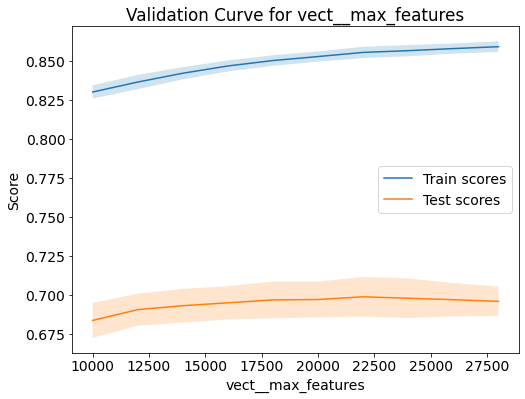

In [15]:
param_grid = {'vect__max_features': np.arange(10000, 30000, 2000)}
plot_validation_curve(pipe, X_test, y_test, param_grid)


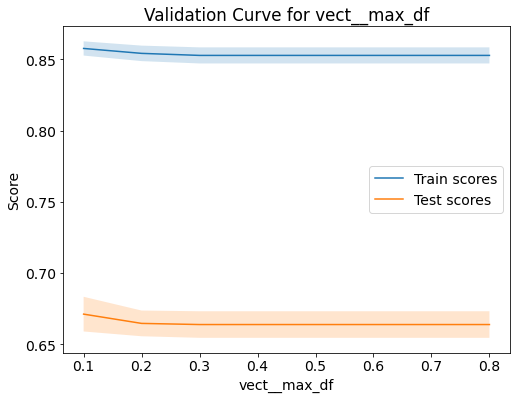

In [16]:
param_grid = {'vect__max_df': np.arange(0.1, 0.9, 0.1)}
plot_validation_curve(pipe, X_test, y_test, param_grid)

We can see that by tuning the parameters we were able to improve the test accuracy from **0.63** to **0.66**.